# Models for learning word embeddings


In [1]:
load_model = 'fasttext_mincount20_window2_size300_alpha0.03_minalpha0.0007_negative20_workers11.model' # model_name
model_name = 'fasttext'
#model = 'word2vec'

In [2]:
if model_name == 'fasttext':
    from gensim.models import FastText as Model
elif model_name == 'word2vec':
    from gensim.models import word2vec as Model
elif model_name == 'word2vec':
    raise Exception("Non allowed parameter for model.")

unable to import 'smart_open.gcs', disabling that module


In [3]:
model = Model.load(load_model)

In [5]:
# Make model more memory-efficient
model.init_sims(replace=True)

# Exploring the model
## Most similar to:


In [6]:
model.wv.most_similar(positive=["keskusta"])

[('Neuvostoliitto', 0.9982584118843079),
 ('Japani', 0.9982272386550903),
 ('loppu', 0.9980958700180054),
 ('ehdokas', 0.9980682730674744),
 ('yhdiste', 0.9980368614196777),
 ('27', 0.9977372288703918),
 ('mm', 0.9977079629898071),
 ('seuraaja', 0.9975426197052002),
 ('11', 0.9974231719970703),
 ('perhe', 0.9973805546760559)]

In [7]:
model.wv.most_similar(positive=["juha"])

[('työ', 0.6006035804748535),
 ('isä', 0.600204586982727),
 ('vanhempi', 0.6000922322273254),
 ('alle', 0.5999611616134644),
 ('Zemo', 0.5999090075492859),
 ('Scott', 0.5997797250747681),
 ('seitsemän', 0.599767804145813),
 ('Voynichin', 0.5997161269187927),
 ('Vasili', 0.5996626019477844),
 ('alku', 0.5996547341346741)]

In [8]:
model.wv.most_similar(positive=["sipilä"])

[('kunnes', 0.5806586742401123),
 ('johto', 0.579970121383667),
 ('kauppa', 0.579412043094635),
 ('tuntea', 0.5787330865859985),
 ('musta', 0.5786128640174866),
 ('valmistua', 0.578463613986969),
 ('Saksa', 0.5783661007881165),
 ('suunnitelma', 0.5780854225158691),
 ('epäonnistua', 0.5780237913131714),
 ('toiminta', 0.5779362320899963)]

In [9]:
model.wv.most_similar(positive=["orpo"])

[('19', 0.2905760407447815),
 ('1993', 0.28968968987464905),
 ('1998', 0.2895287275314331),
 ('1997', 0.2895050644874573),
 ('1994', 0.2894641160964966),
 ('1996', 0.2894504964351654),
 ('1991', 0.2893686890602112),
 ('1985', 0.28935959935188293),
 ('1992', 0.2893027365207672),
 ('1999', 0.28927600383758545)]

## Similarities:

In [10]:
model.wv.similarity("keskusta", 'kokoomus')

0.9336575

In [11]:
model.wv.similarity('juha_sipilä', 'orpo')

0.051271968

## Odd-One-Out:

Here, we ask our model to give us the word that does not belong to the list!

In [12]:
model.wv.doesnt_match(['keskusta', 'juha_sipilä', 'orpo'])

'juha_sipilä'

In [13]:
model.wv.doesnt_match(['kokoomus', 'juha_sipilä', 'orpo'])

'juha_sipilä'

## Analogy difference:

In [14]:
model.wv.most_similar(positive=["orpo"], negative=["keskusta","sipilä"], topn=3)

[('*', -0.42728370428085327),
 ('19', -0.43334460258483887),
 ('(', -0.44832852482795715)]

### t-SNE visualizations:

In [15]:
from plotting import TSNE_scatterplot

## 10 Most similar words vs. 10 Most dissimilar


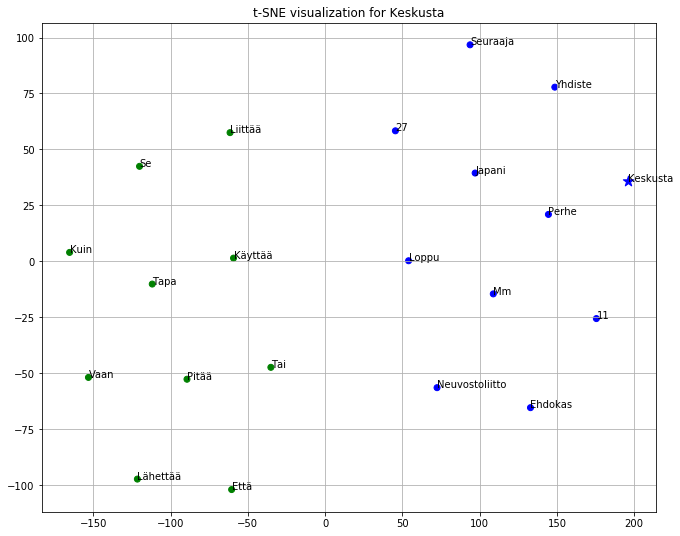

In [16]:
TSNE_scatterplot(model, 'keskusta', "orpo")